# **Frozen Lake Reinforcement Learning and Monte Carlo Methods**

## Frozen Lake Environment

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX06PMEN/ezgif-3-c088eb1282.gif" width="30%" alt="iris image">

Frozen Lake will is a grid-like environment where each tile can be: 

1. **S**: starting point, safe 
2. **F**: frozen surface, safe
3. **H**: hole, fall to your doom
4. **G**: goal, where the disc is located

4 possible actions, the action space is $\{0,1,2,3\} $:
* **Left**: 0 
* **Down**: 1
* **Right**: 2 
* **Up**: 3


Important things to know are that: 
* The game ends if you step in to a hole or get to your goal
* You receive a reward of 1 if you reach the goal, and zero otherwise.

## Setup


In [1]:
pip install gym==0.20.0


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Importing Required Libraries


In [2]:
import gym
import matplotlib.pyplot as plt
from matplotlib import colors
import math
import numpy as np
from collections import defaultdict
from IPython.display import display, Latex

### Defining Helper Functions

In [3]:
def argmax(z,epsilon=0.1):
    """
    This function will select the maximum argument of its input, with the probability of epsilon. Otherwise, 
    it will randomly select the non greedy action
    """
  
    
    argmax_=np.random.choice(np.where(z==z.max())[0])
    
    return argmax_

In [4]:
# helper function to draw the frozen lake
def plot(V,policy,col_ramp=1,dpi=175,draw_vals=False): 
    plt.rcParams['figure.dpi'] = dpi
    plt.rcParams.update({'axes.edgecolor': (0.32,0.36,0.38)})
    plt.rcParams.update({'font.size': 4 if env.env.nrow == 8 else 7})
    plt.figure(figsize=(3,3))
    plt.imshow(1-V.reshape(env.env.nrow,env.env.ncol)**col_ramp, cmap='gray', interpolation='none', clim=(0,1))
    ax = plt.gca()
    ax.set_xticks(np.arange(env.env.ncol)-.5)
    ax.set_yticks(np.arange(env.env.nrow)-.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    for s in range(env.nS):
        x = s%env.env.nrow
        y = int(s/env.env.ncol)
        a = policy[s]
        gray = np.array((0.32,0.36,0.38))
        if env.desc.tolist()[y][x] == b'G': 
            plt.text(x-0.45,y-0.3, 'goal', color=(0.75,0.22,0.17), fontname='Sans', weight='bold')
            continue
        if a[0] > 0.0: plt.arrow(x, y, float(a[0])*-.84, 0.0, color=gray+0.2*(1-V[s]), head_width=0.1, head_length=0.1) # left
        if a[1] > 0.0: plt.arrow(x, y, 0.0, float(a[1])*.84,  color=gray+0.2*(1-V[s]), head_width=0.1, head_length=0.1) # down
        if a[2] > 0.0: plt.arrow(x, y, float(a[2])*.84, 0.0,  color=gray+0.2*(1-V[s]), head_width=0.1, head_length=0.1) # right
        if a[3] > 0.0: plt.arrow(x, y, 0.0, float(a[3])*-.84, color=gray+0.2*(1-V[s]), head_width=0.1, head_length=0.1) # up
        if env.desc.tolist()[y][x] == b'F': plt.text(x-0.45,y-0.3, 'ice', color=(gray*V[s]), fontname='Sans')
        if env.desc.tolist()[y][x] == b'S': plt.text(x-0.45,y-0.3, 'start',color=(0.21,0.51,0.48), fontname='Sans', weight='bold')
        if draw_vals and V[s]>0:
            vstr = '{0:.1e}'.format(V[s]) if env.env.nrow == 8 else '{0:.6f}'.format(V[s])
            plt.text(x-0.45,y+0.45, vstr, color=(gray*V[s]), fontname='Sans')
    plt.grid(color=(0.42,0.46,0.48), linestyle=':')
    ax.set_axisbelow(True)
    ax.tick_params(color=(0.42,0.46,0.48),which='both',top='off',left='off',right='off',bottom='off')
    plt.show()

In [5]:
def pi_star_from_Q(Q):
    done = False
    pi_star = np.zeros([env.observation_space.n, env.action_space.n])
    state = env.reset() # start in top-left, = 0
    while not done:
        action = np.argmax(Q[state])
        pi_star[state,action] = 1
        state, reward, done, _ = env.step(action)
    return pi_star

## **Expreriment:**

Initialize the enviroenment:

In [6]:
env = gym.make("FrozenLake-v1", is_slippery=False)

Visualize the environment 

In [7]:
env.render()


SFFF
FHFH
FFFH
HFFG


The **action space** of the environment. 


In [8]:
env.action_space

Discrete(4)

Run a simple environment episode: 

In [10]:
actions=[2,2,1,1,1,2]

current_observation = env.reset() # start a new game
t= 0
for i in actions: # make 6 actions
    state, reward, done, prob = env.step(i) # step through the action and get the outputs

    # here's a look at what we get back
    print(f"state: {state}, reward: {reward}, done: {done}, {prob}, time step {t}, action {i}")
    t+=1
    env.render() 

state: 1, reward: 0.0, done: False, {'prob': 1.0}, time step 0, action 2
  (Right)
SFFF
FHFH
FFFH
HFFG
state: 2, reward: 0.0, done: False, {'prob': 1.0}, time step 1, action 2
  (Right)
SFFF
FHFH
FFFH
HFFG
state: 6, reward: 0.0, done: False, {'prob': 1.0}, time step 2, action 1
  (Down)
SFFF
FHFH
FFFH
HFFG
state: 10, reward: 0.0, done: False, {'prob': 1.0}, time step 3, action 1
  (Down)
SFFF
FHFH
FFFH
HFFG
state: 14, reward: 0.0, done: False, {'prob': 1.0}, time step 4, action 1
  (Down)
SFFF
FHFH
FFFH
HFFG
state: 15, reward: 1.0, done: True, {'prob': 1.0}, time step 5, action 2
  (Right)
SFFF
FHFH
FFFH
HFFG


Define a new python function that will follow the epsilon probability and return an action:

In [11]:
def random_action(action,epsilon=0.1,n_actions=4):
    ''' 
    This function takes the best estimated action, eplsilon, and action space 
    and returns some action. 
    '''
    # generate a random number from 0 to 1.
    number = np.random.rand(1)
    
    # if number is smaller than 1-epsilon then return best estimated action
    if number<1-epsilon:
        return action
    # if number is bigger or equals to 1-epsilon then return some random action from the action space
    else:
        action=np.random.randint(n_actions)  
        return action 

## Monte Carlo Method 
Implement asimple Monte Carlo Algorithm and Train our Agent: 

In [12]:
def monte_carlo( environment,N_episodes=10000,epsilon=0.1, discount_factor=1,first_visit=True):
    """
    This function determines the optimal policy using the epsilon greedy method. The input parameters are the discount factor, the number of episodes, epsilon value and the open AI gym objects. The class also Specifies if first-visit and every-visit method. The output is the policy,value function and action function.
    Returns:  
    policy: a dictionary of estimated policy for Frozen Lake 
    Q: a dictionary of estimated action function
    
    Args:
    environment:AI gym Frozen Lake env object 
    N_episodes:number of episodes 
    discount_factor:discount factor
    """  
   
    #dictionary of estimated action function for FrozenLake
    Q=defaultdict(float)
    
    # number of visits to the action function 
    NumberVisits= defaultdict(float)
   
    #dictionary  for policy 
    policy=defaultdict(float)
    
    #number  of actions 
    number_actions=environment.action_space.n
  
    
    for i in range(N_episodes):
        
        #list that stores each state and reward for each episode     
        episode=[]
        # reset the  environment for the next episode and find first state  
        state=environment.reset() 
        #reward for the first state
        reward=0.0
        #flag for end of episodes  
        done=False
        
         #check if a policy for the state exists  
        if isinstance(policy[state],np.int64):
            #obtain action from policy 
            action=policy[state]
            action=random_action(action,epsilon,n_actions=4)

        else:
            #if no policy for the state exists  select a random  action  
            action=np.random.randint(number_actions)
        
        
        #append first state, reward and action
        episode.append({'state':state , 'reward':reward,'action':action})

        #enumerate for each episode 
        while not(done):

                #take action and find next state, reward and check if the episode is  done (True)
                (state, reward, done, prob) = environment.step(action)

                #check if a policy for the state exists  
                if isinstance(policy[state],np.int64):
                    #obtain action from policy
                    action=int(policy[state])
                    action=random_action(action,epsilon,n_actions=4)

                else:
                     #if no policy for the state exists  select a random  action  
                    action=np.random.randint(number_actions)
                    
                #add state reward and action to list 
                episode.append({'state':state , 'reward':reward,'action':action})
                
         #reverse list as the return is calculated from the last state
        episode.reverse()


        # determine the return
        G=0
        flag=0
        for t,step in enumerate(episode):
                
                G=discount_factor*G+step['reward']
                
                #increment counter for action 
                NumberVisits[step['state'],step['action']]+=1
        
                #if the action function value  does not exist, create an array  to store them 
                if not(isinstance(Q[step['state']],np.ndarray) ):
                    Q[step['state']]= np.zeros((number_actions))

                #calculate mean of action function Q Value functions using the  recursive definition of mean 
                Q[step['state']][step['action']]=Q[step['state']][step['action']]+(NumberVisits[step['state'],step['action']]**-1)*(G-Q[step['state']][step['action']])
                        
                #update the policy to select the action funciton argment with the largest value randomly select a different action 
                policy[step['state']]=np.random.choice(np.where(Q[step['state']]==Q[step['state']].max())[0])
                        
   
    return policy, Q

Will train it with $1000$ episodes, epsilon of $0.2$ and discount factor of $0.8$:

In [13]:
policy, Q = monte_carlo(env,N_episodes=1000,epsilon=0.01, discount_factor=0.8)  

Visualize the possible path that we will take using our policy and plot the grid with chosen actions for each state. 

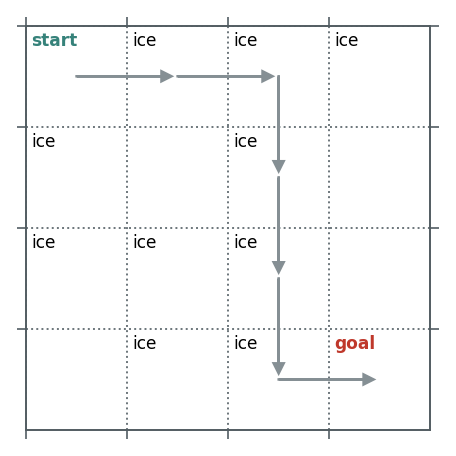

In [14]:
plot(np.zeros_like([0]*env.observation_space.n), pi_star_from_Q(Q))

Check the success rate when agent is using random actions from the action space:

In [16]:
episodes=1000
sum_=0
epsilon = 0.2
for episode in range(episodes):
    state= env.reset()
    done=False
    
    while (not(done)):
        action=np.random.randint(env.action_space.n)
        state,reward,done,info = env.step(action)
    sum_+=reward
sum_/episodes*100

2.1

Check the success rate when agent is using our trained epsilon-greedy policy.

In [19]:
episodes=1000
sum_=0
epsilon = 0.2
for episode in range(episodes):
    state= env.reset()
    done=False
    
    while (not(done)):
        action=policy[state]
        action=random_action(action,epsilon,n_actions=4)

        state,reward,done,info = env.step(action)
    sum_+=reward
sum_/episodes*100

67.4

Around $70\%$, check just policy with no epsilon (exploration factor): 

In [20]:
episodes=1000
sum_=0
epsilon = 0.2
for episode in range(episodes):
    state= env.reset()
    done=False
    
    while (not(done)):
        action=policy[state]
        state,reward,done,info = env.step(action)
    sum_+=reward
sum_/episodes*100

100.0

$100\%$ of cases, Agent has successfully solved the environment.

## Bigger and More Complicated
Bigger Frozen lake environment,  change it to $8 \times 8$. We will have $8\times 8 \times 4 = 256$ possible state action pairs. 

Training our model in this bigger environment. First import the environment:

In [21]:
env = gym.make('FrozenLake8x8-v1', is_slippery=False) 

Check how it looks:

In [23]:
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


Train the model in the new environment:

In [24]:
policy, Q = monte_carlo(env,N_episodes=10000,epsilon=0.2, discount_factor=0.9)  

Visualize the path that we will take using the resulted policy:

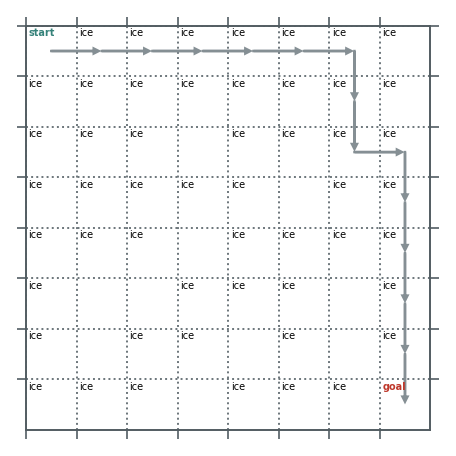

In [26]:
plot(np.zeros_like([0]*env.observation_space.n), pi_star_from_Q(Q))

Conclusion: have created a successful algorithm, that solves a deterministic environment.